In [1]:
import matplotlib.pyplot as plt 

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("mock up points.csv")
df

,201600,201700
0,360,299
1,361,300
2,362,310
3,372,320
4,380,333
5,385,333
6,387,336
7,388,338
8,390,340
9,391,341


array([414., 403.])

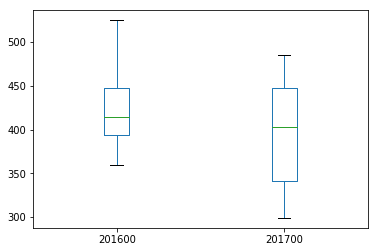

In [13]:
df.plot.box(
'True')
np.median(df,[0])


references

https://www.tutorialspoint.com/python/python_box_plots.htm

https://www.mathsisfun.com/data/quartiles.html --reminder of how to work out quartiles!